In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
df = pd.read_csv('Transformed_Community_District_Data.csv')
df.head()

,Community District Name,Race,Year,Count
0,Manhattan 1,White,2019,220
1,Manhattan 2,White,2019,199
2,Manhattan 3,White,2019,274
3,Manhattan 4,White,2019,291
4,Manhattan 5,White,2019,452


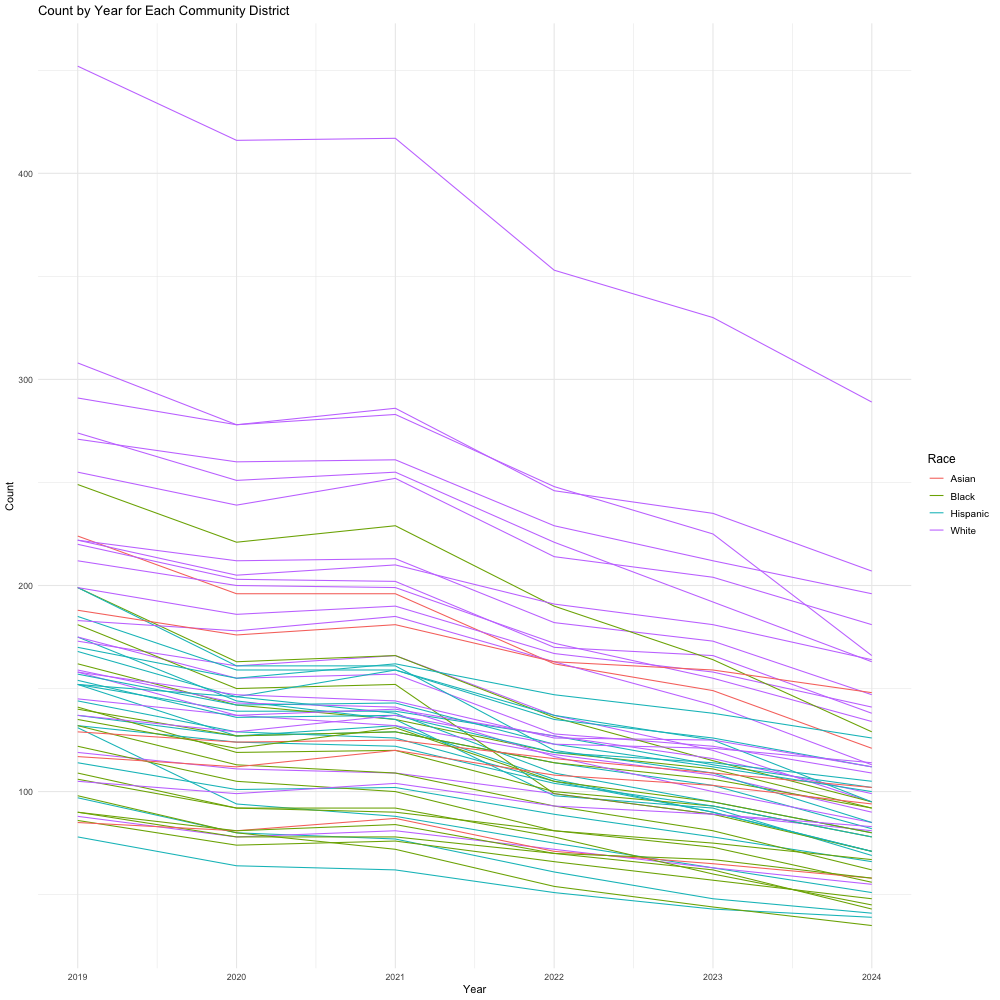

In [5]:
%%R -i df -w 1000 -h 1000

# Assuming your data frame is named 'data' and has columns 'Year', 'Count', 'Community District Name', and 'Race'
ggplot(df, aes(x = Year, y = Count, group = `Community District Name`, color = Race)) +
  geom_line() +
  labs(title = "Count by Year for Each Community District",
       x = "Year",
       y = "Count") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(min(df$Year), max(df$Year), by = 1)) +  # Adjust x-axis for yearly data
  theme(legend.title = element_text(size = 12),  # Customize legend title size
        legend.text = element_text(size = 10))  # Customize legend text size


In [6]:
# Assuming your DataFrame is named 'data' and it contains 'Year', 'Count', 'Community District Name', and 'Race'
grouped_data = df.groupby(['Community District Name', 'Year', 'Race']).agg({'Count': 'mean'}).reset_index()

# Display the head of the grouped DataFrame to check
grouped_data


,Community District Name,Year,Race,Count
0,Bronx 1,2019,Hispanic,131.0
1,Bronx 1,2020,Hispanic,94.0
2,Bronx 1,2021,Hispanic,88.0
3,Bronx 1,2022,Hispanic,75.0
4,Bronx 1,2023,Hispanic,63.0
...,...,...,...,...
349,Staten Island 3,2020,White,129.0
350,Staten Island 3,2021,White,137.0
351,Staten Island 3,2022,White,123.0
352,Staten Island 3,2023,White,121.0


In [7]:
# Assuming your DataFrame is named 'data' and it includes columns 'Year', 'Count', and 'Race'
grouped_data = df.groupby(['Race', 'Year']).agg({'Count': 'mean'}).reset_index()

# To display the first few rows of the grouped DataFrame
grouped_data


,Race,Year,Count
0,Asian,2019,148.600000
1,Asian,2020,137.800000
2,Asian,2021,141.800000
3,Asian,2022,124.000000
4,Asian,2023,117.000000
5,Asian,2024,104.600000
6,Black,2019,136.000000
7,Black,2020,117.200000
8,Black,2021,117.533333
9,Black,2022,97.066667


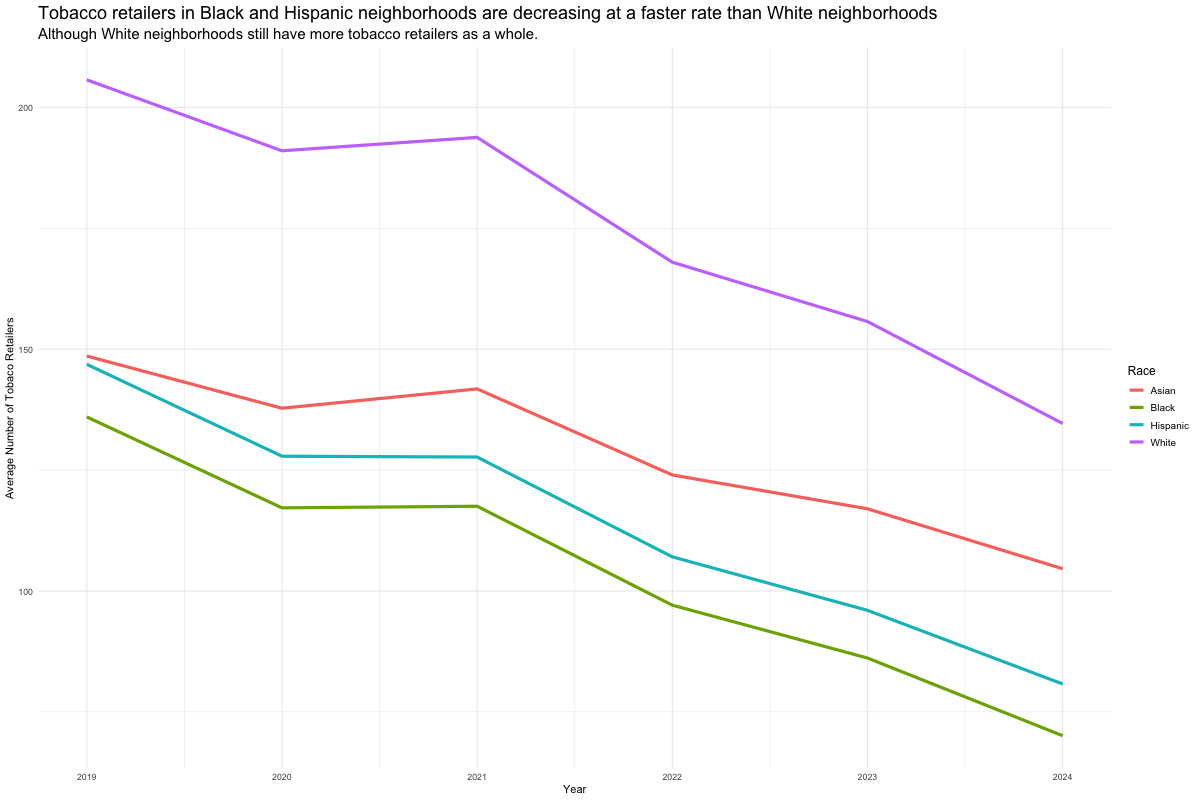

In [24]:
%%R -i grouped_data -w 1200 -h 800

df <- grouped_data

# Assuming your grouped data frame is named 'grouped_data' and it contains 'Year', 'Count', and 'Race'
plot <- ggplot(df, aes(x = as.numeric(Year), y = Count, group = Race, color = Race)) +
  geom_line(
     size = 1.5
  ) +
  labs(title = "Tobacco retailers in Black and Hispanic neighborhoods are decreasing at a faster rate than White neighborhoods", subtitle = "Although White neighborhoods still have more tobacco retailers as a whole.",
       x = "Year",
       y = "Average Number of Tobaco Retailers") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(min(df$Year), max(df$Year), by = 1)) +  # Adjust x-axis for yearly data
  theme(legend.title = element_text(size = 12),  # Customize legend title size
        legend.text = element_text(size = 10),  # Customize legend text size
        plot.title = element_text(size = 18),  # Customize plot title size and weight
      plot.subtitle = element_text(size = 15) # Customize plot subtitle size
  )

print(plot)

In [ ]:
%%R

#export plot as png
ggsave("plot.png", plot, width = 1000, height = 1000)

In [32]:
# create new column isMidtown. If Community District Name is Manhattan 1, Manhattan 2, Manhattan 5, or Manhattan 6, then fill true. else, false
df['isMidtown'] = df['Community District Name'].apply(lambda x: 'Manhattan' in x and x[-1] in ['1', '2', '5', '6'])
df.head()

,Community District Name,Race,Year,Count,isMidtown
0,Manhattan 1,White,2019,220,True
1,Manhattan 2,White,2019,199,True
2,Manhattan 3,White,2019,274,False
3,Manhattan 4,White,2019,291,False
4,Manhattan 5,White,2019,452,True


In [33]:
df_no_midtown = df[~df['isMidtown']]
df_no_midtown

,Community District Name,Race,Year,Count,isMidtown
2,Manhattan 3,White,2019,274,False
3,Manhattan 4,White,2019,291,False
6,Manhattan 7,White,2019,183,False
7,Manhattan 8,White,2019,222,False
8,Manhattan 9,Black,2019,106,False
...,...,...,...,...,...
349,Queens 13,Black,2024,80,False
350,Queens 14,Black,2024,58,False
351,Staten Island 1,White,2024,164,False
352,Staten Island 2,White,2024,112,False


In [34]:
# Assuming your DataFrame is named 'data' and it includes columns 'Year', 'Count', and 'Race'
df_no_midtown_race = df_no_midtown.groupby(['Race', 'Year']).agg({'Count': 'mean'}).reset_index()

# To display the first few rows of the grouped DataFrame
df_no_midtown_race


,Race,Year,Count
0,Asian,2019,148.600000
1,Asian,2020,137.800000
2,Asian,2021,141.800000
3,Asian,2022,124.000000
4,Asian,2023,117.000000
5,Asian,2024,104.600000
6,Black,2019,136.000000
7,Black,2020,117.200000
8,Black,2021,117.533333
9,Black,2022,97.066667


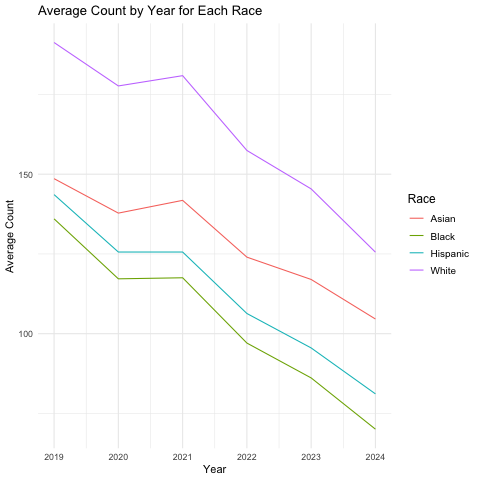

In [35]:
%%R -i df_no_midtown_race

df <- df_no_midtown_race

# Assuming your grouped data frame is named 'grouped_data' and it contains 'Year', 'Count', and 'Race'
ggplot(df, aes(x = as.numeric(Year), y = Count, group = Race, color = Race)) +
  geom_line() +
  labs(title = "Average Count by Year for Each Race",
       x = "Year",
       y = "Average Count") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(min(df$Year), max(df$Year), by = 1)) +  # Adjust x-axis for yearly data
  theme(legend.title = element_text(size = 12),  # Customize legend title size
        legend.text = element_text(size = 10))  # Customize legend text size
